### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

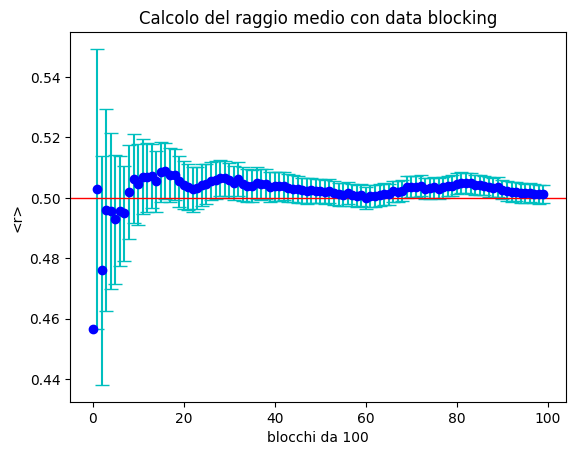

In [1]:
import matplotlib.pyplot as plt
import numpy as np

med_fin = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\med_err.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        med_fin.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(med_fin)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, med_fin, yerr=err, fmt='o', capsize=5, color='blue', ecolor='c')
plt.axhline(y=0.5, color='red', linestyle='solid', linewidth=1)
plt.xlabel('blocchi da 100')
plt.ylabel('<r>')
plt.title('Calcolo del raggio medio con data blocking')

plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

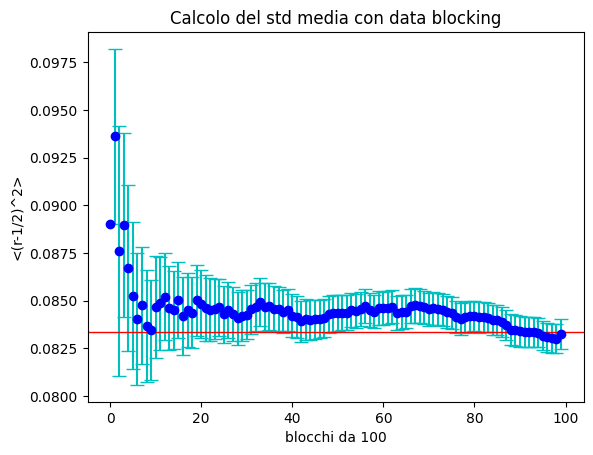

In [2]:
import matplotlib.pyplot as plt
import numpy as np

med_fin = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\std.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        med_fin.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(med_fin)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, med_fin, yerr=err, fmt='o', capsize=5, color='blue', ecolor='c')
plt.axhline(y=1/12, color='red', linestyle='solid', linewidth=1)
plt.xlabel('blocchi da 100')
plt.ylabel('<(r-1/2)^2>')
plt.title('Calcolo del std media con data blocking')

plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

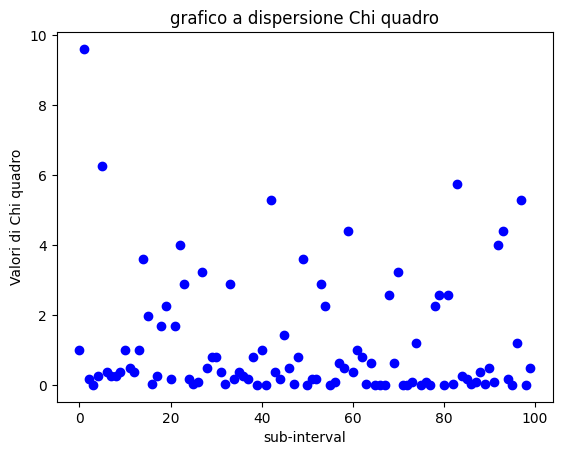

In [3]:
with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\chi.txt', 'r') as file:
    chi = [float(line.strip()) for line in file]

plt.plot(chi, marker='o', linestyle='', color='blue')

# Aggiungi titoli e label agli assi
plt.title('grafico a dispersione Chi quadro')
plt.xlabel('sub-interval')
plt.ylabel('Valori di Chi quadro')

# Mostra il grafico
plt.show()


### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

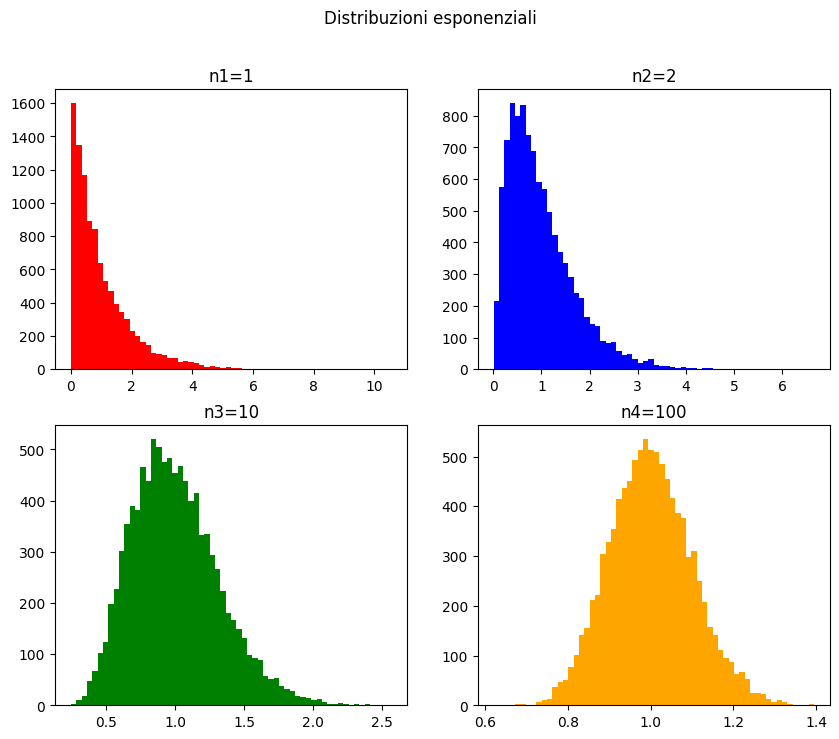

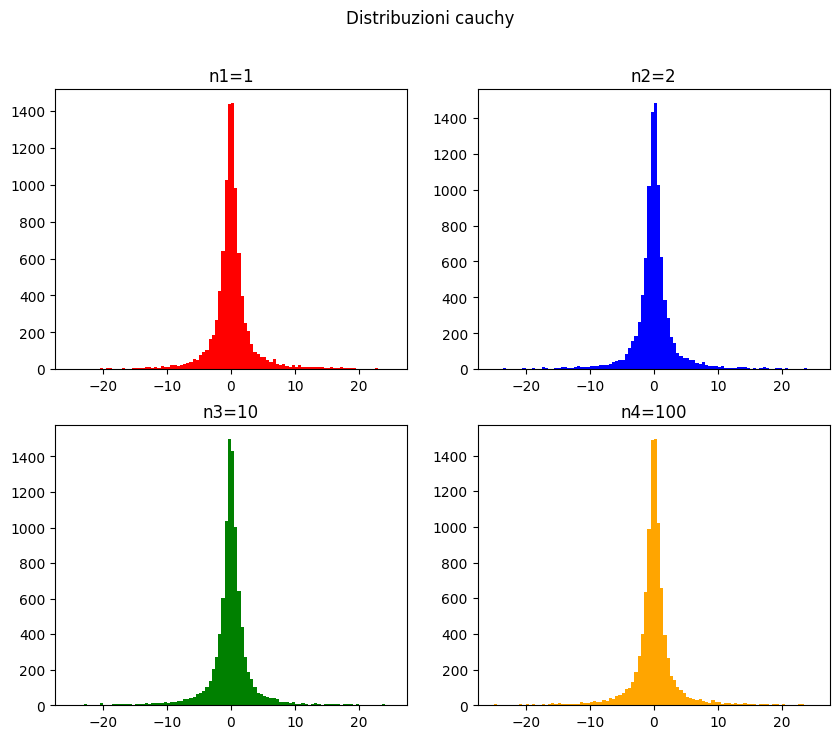

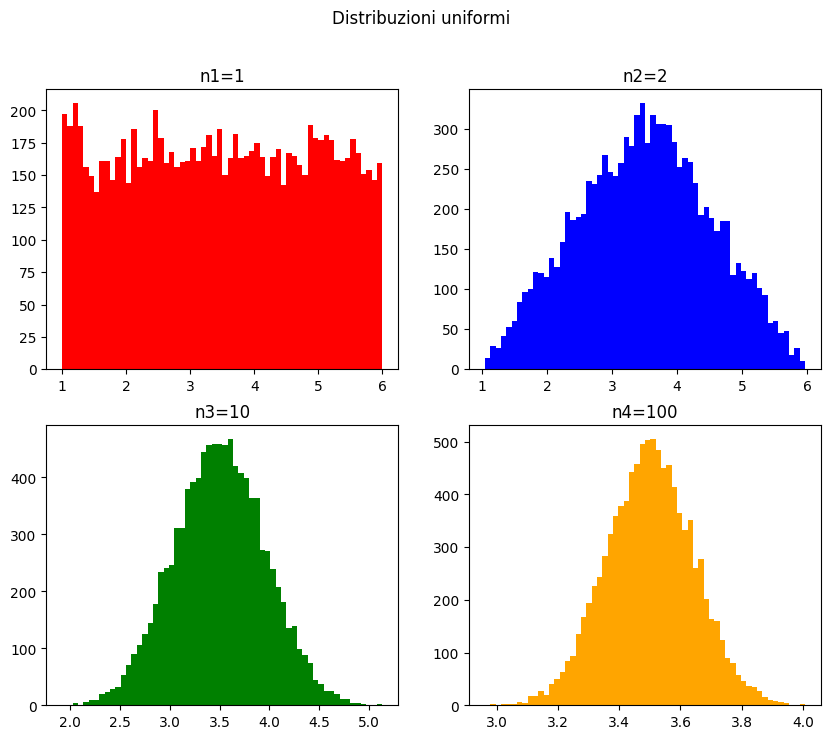

In [11]:
from scipy.stats import norm


rand_exp1 = []
rand_exp2 = []
rand_exp3 = []
rand_exp4 = []
rand_cauchy1=[]
rand_cauchy2=[]
rand_cauchy3=[]
rand_cauchy4=[]
rand_unif1=[]
rand_unif2=[]
rand_unif3=[]
rand_unif4=[]


with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_2\distribuzione_exp.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        rand_exp1.append(float(values[0]))
        rand_exp2.append(float(values[1]))
        rand_exp3.append(float(values[2]))
        rand_exp4.append(float(values[3]))

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\distribuzione_cauchy.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        rand_cauchy1.append(float(values[0]))
        rand_cauchy2.append(float(values[1]))
        rand_cauchy3.append(float(values[2]))
        rand_cauchy4.append(float(values[3]))

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\distribuzione_unif.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        rand_unif1.append(float(values[0]))
        rand_unif2.append(float(values[1]))
        rand_unif3.append(float(values[2]))
        rand_unif4.append(float(values[3]))



#GRAFICO EXP
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Creiamo l'istogramma per ogni colonna nei relativi assi
axs[0, 0].hist(rand_exp1, bins=60, color='red')
axs[0, 0].set_title('n1=1')

axs[0, 1].hist(rand_exp2, bins=60, color='blue')
axs[0, 1].set_title('n2=2')

axs[1, 0].hist(rand_exp3, bins=60, color='green')
axs[1, 0].set_title('n3=10')

axs[1, 1].hist(rand_exp4, bins=60, color='orange')
axs[1, 1].set_title('n4=100')

# Aggiungiamo un titolo alla figura
fig.suptitle('Distribuzioni esponenziali')


#GRAFICO CAUCHY
fig2, axs2 = plt.subplots(2, 2, figsize=(10, 8))

# Creiamo l'istogramma per ogni colonna nei relativi assi
axs2[0, 0].hist(rand_cauchy1, bins=100, range=(-25,25), color='red')
axs2[0, 0].set_title('n1=1')

axs2[0, 1].hist(rand_cauchy2, bins=100, range=(-25,25), color='blue')
axs2[0, 1].set_title('n2=2')

axs2[1, 0].hist(rand_cauchy3, bins=100, range=(-25,25), color='green')
axs2[1, 0].set_title('n3=10')

axs2[1, 1].hist(rand_cauchy4, bins=100, range=(-25,25), color='orange')
axs2[1, 1].set_title('n4=100')


# Aggiungiamo un titolo alla figura
fig2.suptitle('Distribuzioni cauchy')


#GRAFICO UNIF
fig3, axs3 = plt.subplots(2, 2, figsize=(10, 8))

# Creiamo l'istogramma per ogni colonna nei relativi assi
axs3[0, 0].hist(rand_unif1, bins=60, color='red')
axs3[0, 0].set_title('n1=1')

axs3[0, 1].hist(rand_unif2, bins=60, color='blue')
axs3[0, 1].set_title('n2=2')

axs3[1, 0].hist(rand_unif3, bins=60, color='green')
axs3[1, 0].set_title('n3=10')

axs3[1, 1].hist(rand_unif4, bins=60, color='orange')
axs3[1, 1].set_title('n4=100')

# Aggiungiamo un titolo alla figura
fig3.suptitle('Distribuzioni uniformi')


# Mostrare i grafici
plt.show()


### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

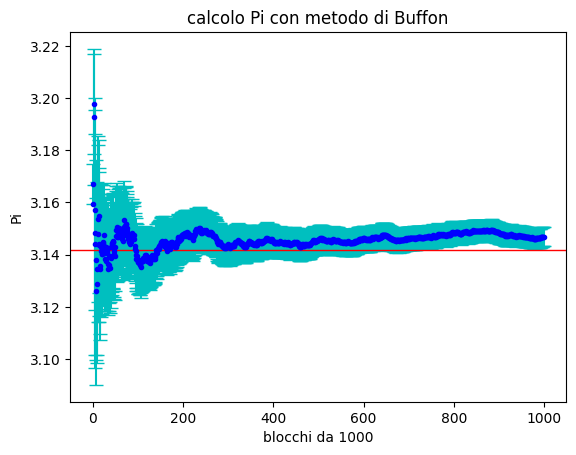

In [13]:
import math

Pi = []
err = []

with open(r'C:\Users\Utente\Documents\Python Scripts\lezione_1\Pi_buffon.txt', 'r') as file:
    for line in file:
        values = line.split(',')
        Pi.append(float(values[0]))
        err.append(float(values[1]))

x = np.arange(len(Pi)) # Definizione delle posizioni delle barre sull'asse x

plt.errorbar(x, Pi, yerr=err, fmt='o', capsize=5, color='blue', ecolor='c', markersize=3)
plt.axhline(y=math.pi, color='red', linestyle='solid', linewidth=1)
plt.xlabel('blocchi da 1000')
plt.ylabel('Pi')
plt.title('calcolo Pi con metodo di Buffon')

plt.show()




